In [171]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)

In [172]:
loan_df = pd.read_csv('loan_prediction.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [173]:
loan_df.shape

(614, 13)

In [174]:
print('Numerical columns :',loan_df.select_dtypes(exclude='object').columns.tolist())
print('Catagorical columns :',loan_df.select_dtypes(include='object').columns.tolist())


Numerical columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Catagorical columns : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [175]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [176]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [177]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)

loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)


/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_2333/1254328049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_2333/1254328049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Text(0.5, 1.0, 'Loan Status Destribution')

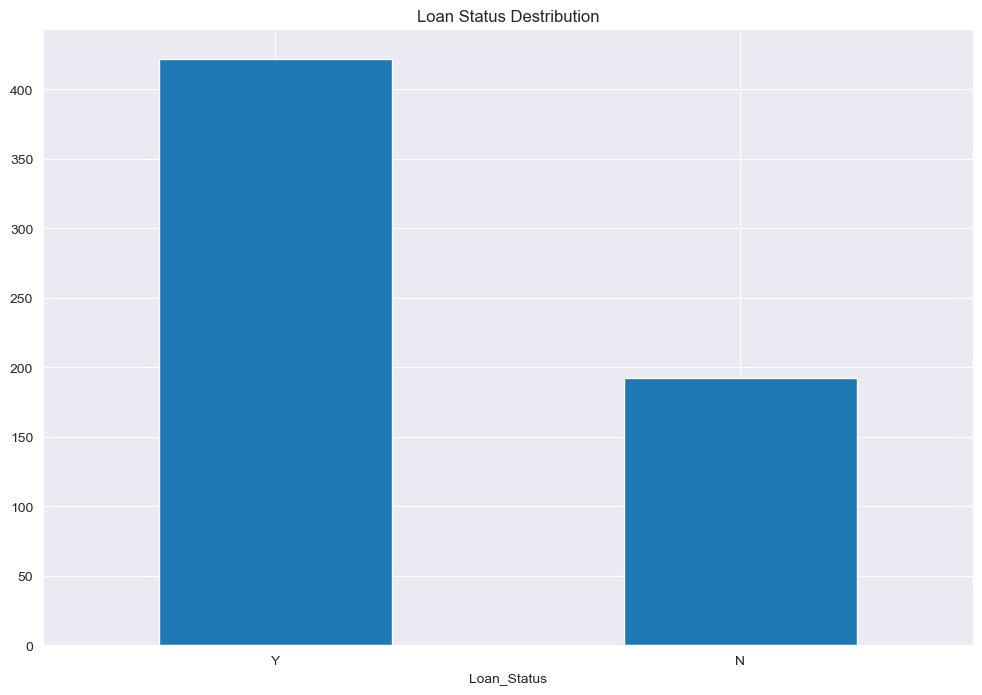

In [178]:
plt.figure(figsize=(12,8))
loan_df['Loan_Status'].value_counts().plot(kind ='bar')
plt.xticks(rotation=360)
plt.title('Loan Status Destribution')

Shows High Class Imbalance. So might need to resample later.

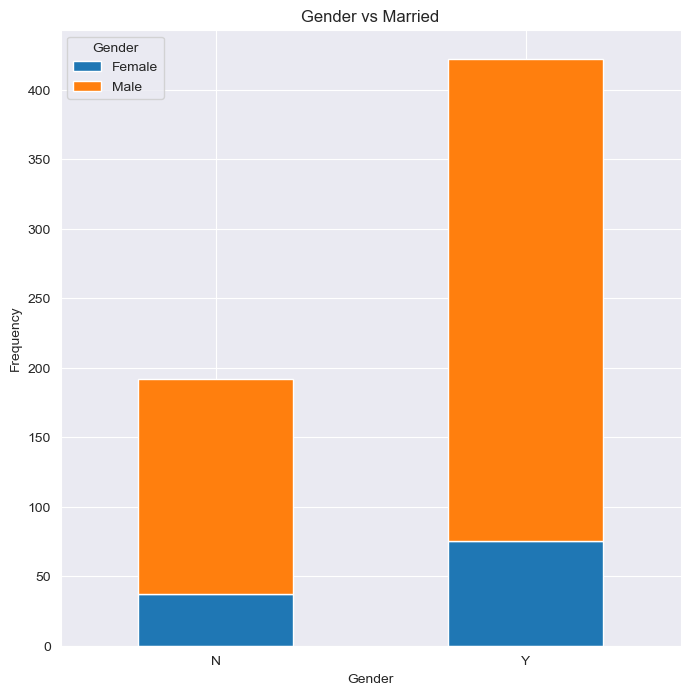

In [179]:
pd.crosstab(loan_df.Loan_Status,loan_df.Gender).plot(kind = "bar",stacked = True)

plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


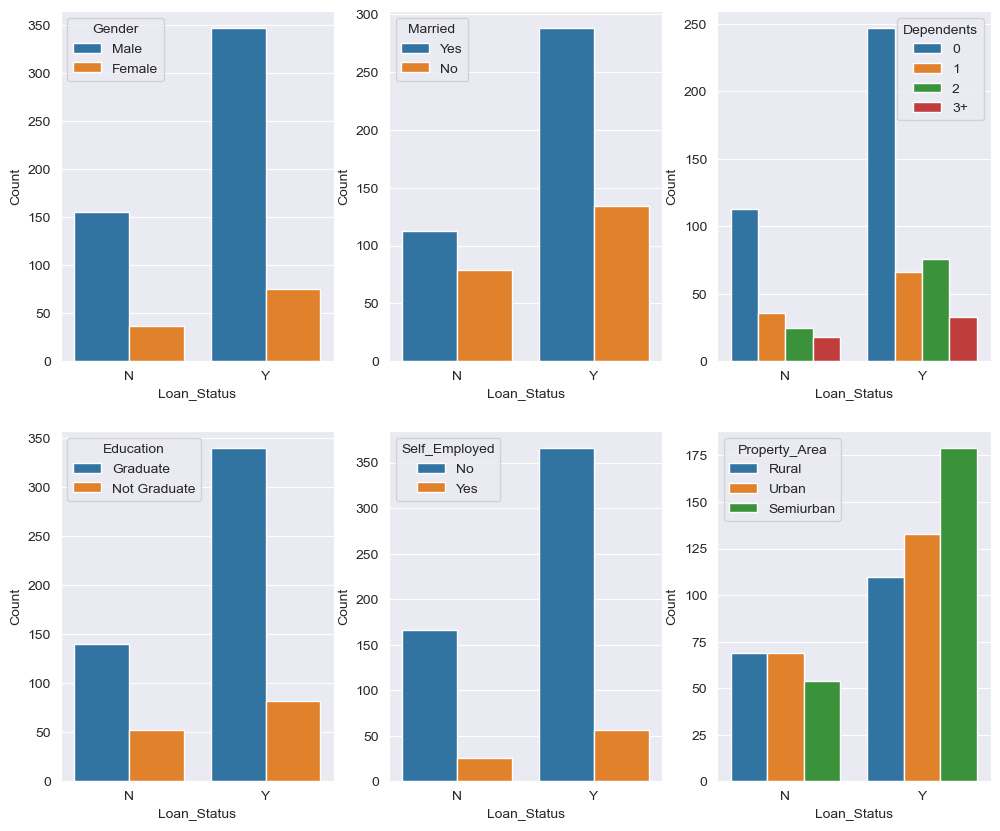

In [180]:
catagorical_cols = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

plt.figure(figsize=(12,10))
for i,col in enumerate(catagorical_cols):
 plt.subplot(2, 3, i+1)
 col_plot = loan_df.groupby('Loan_Status')[col].value_counts().reset_index(name = 'Count')
 sns.barplot(x='Loan_Status',y='Count',hue=col,data=col_plot)
 
plt.show()
 

<Figure size 1200x800 with 0 Axes>

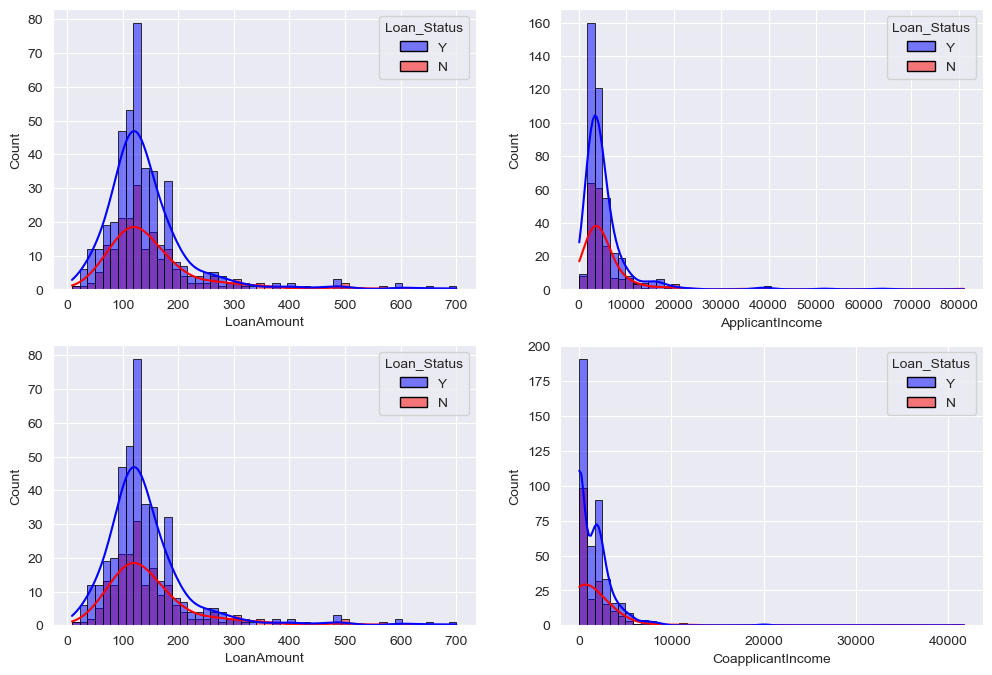

In [181]:
plt.figure(figsize=(12,8))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(x=loan_df['LoanAmount'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 2)
sns.histplot(x=loan_df['ApplicantIncome'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 3)
sns.histplot(x=loan_df['LoanAmount'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 4)
sns.histplot(x=loan_df['CoapplicantIncome'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)
plt.show()

Text(0.5, 1.0, 'Box plot for LoanAmount')

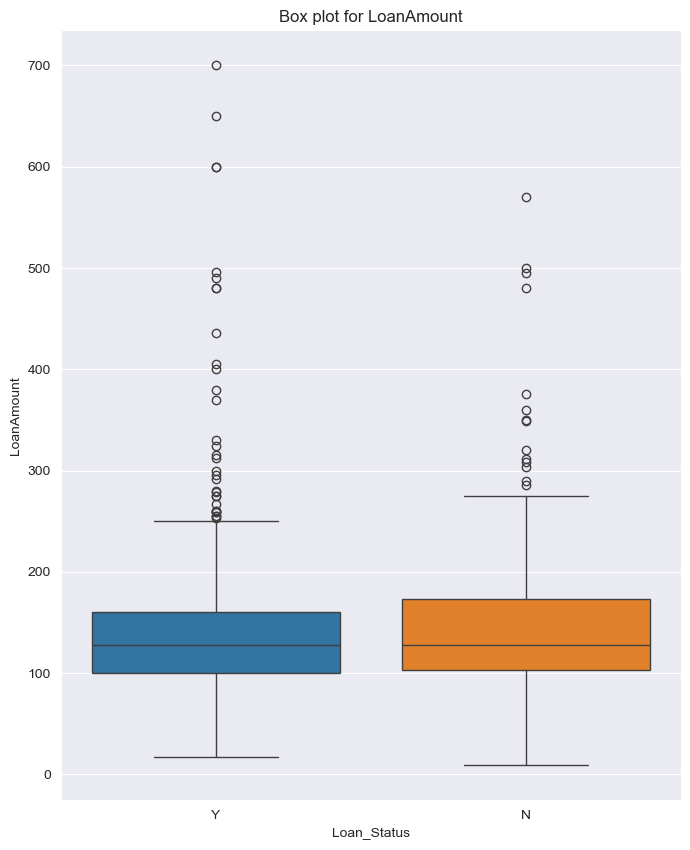

In [182]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Loan_Status',y='LoanAmount',data=loan_df,hue='Loan_Status')
plt.title('Box plot for LoanAmount')

Removeing unnesessary features

In [183]:
loan_df.drop('Loan_ID',inplace=True,axis =1)

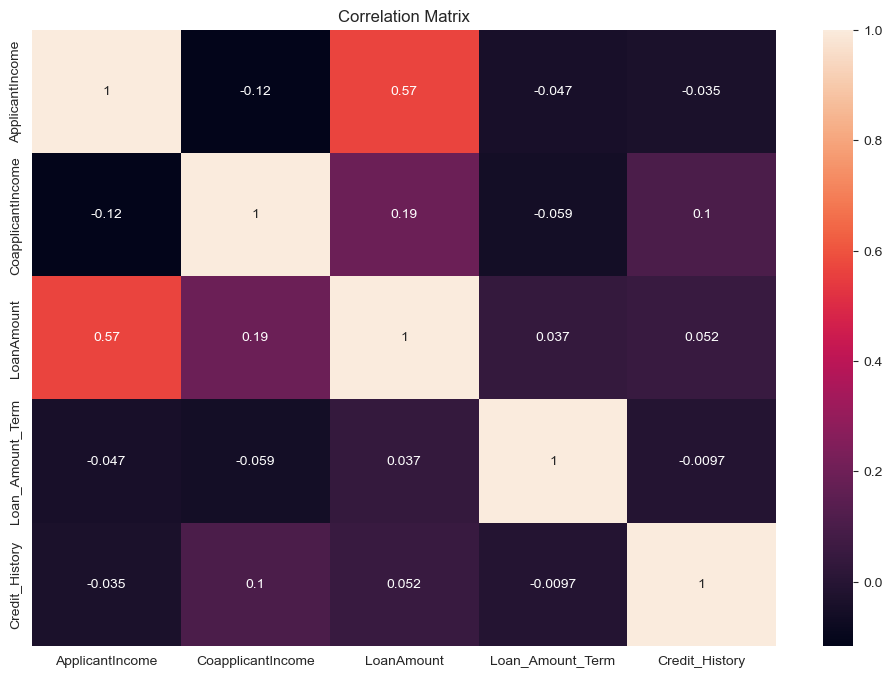

In [184]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation = loan_df[numerical_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()

Just one relatively strong correlation exists : Loan Amount - Applicant Income 

##### Data Preprocessing:
        1. Convert catagorical to numerical (one-hot encoding) 
        2. Remove Outliers

In [185]:
#1
loan_df = pd.get_dummies(loan_df,columns=catagorical_cols)

In [147]:
# q1 = loan_df[numerical_cols].quantile(0.25)
# q3 = loan_df[numerical_cols].quantile(0.75)
# IQR = q3 - q1
# 
# lower_bound = q1 - 1.5 * IQR
# upper_bound = q3 + 1.5 * IQR
# 
# # Filter out outliers and assign them NaN
# loan_df[numerical_cols] = loan_df[numerical_cols].where(
#     (loan_df[numerical_cols] >= lower_bound) &
#     (loan_df[numerical_cols] <= upper_bound)
# )


In [148]:
#loan_df = loan_df.dropna(axis = 0)

This drasticaly reduces the datasize so we dont apply this ste

In [186]:
loan_df_2 = loan_df.copy()

loan_df_2.ApplicantIncome = np.sqrt(loan_df.ApplicantIncome)
loan_df_2.CoapplicantIncome = np.sqrt(loan_df.CoapplicantIncome)
loan_df_2.LoanAmount = np.sqrt(loan_df.LoanAmount)



<Figure size 1200x800 with 0 Axes>

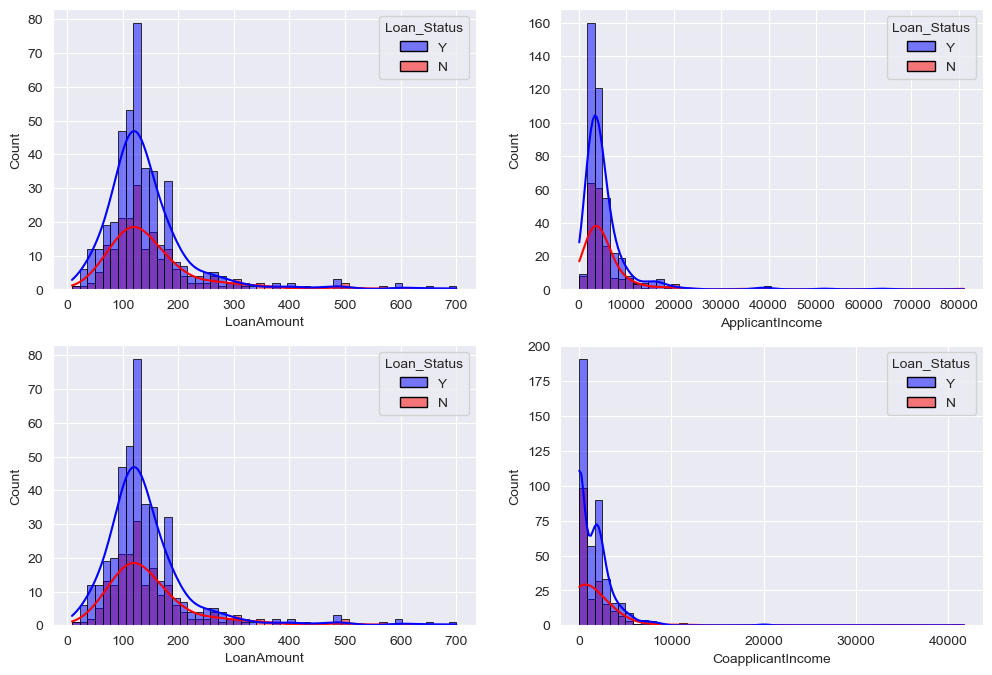

In [187]:
plt.figure(figsize=(12,8))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(x=loan_df['LoanAmount'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 2)
sns.histplot(x=loan_df['ApplicantIncome'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 3)
sns.histplot(x=loan_df['LoanAmount'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)

plt.subplot(2, 2, 4)
sns.histplot(x=loan_df['CoapplicantIncome'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)
plt.show()

looks alot better than pervious. High skewness resolved

Resampleing No classes to make it more balances and then we goto feature engineeringg

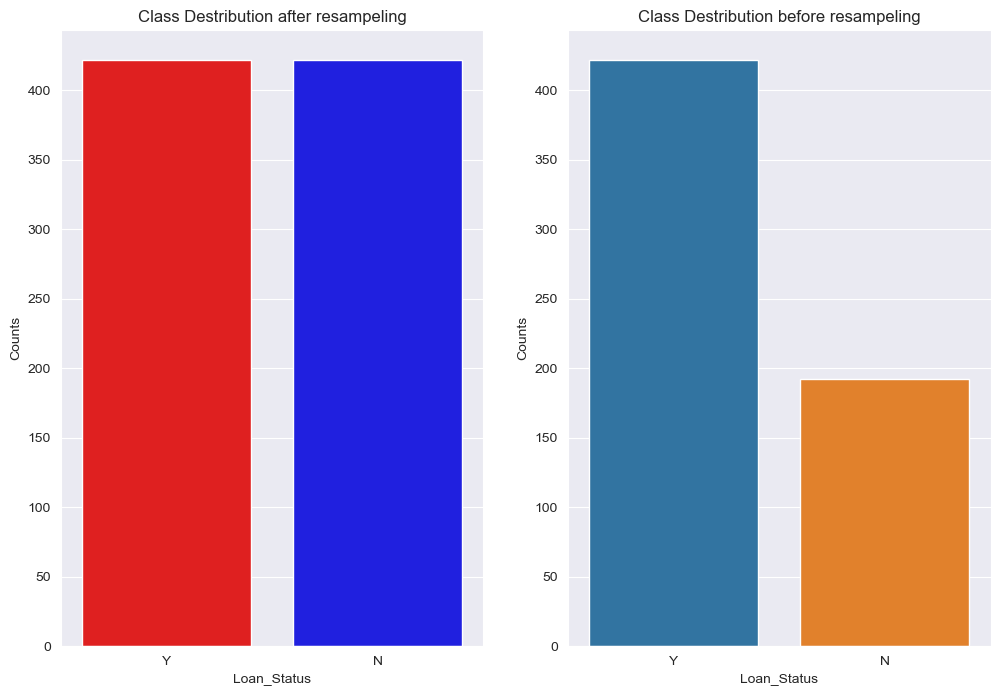

In [192]:
from sklearn.utils import resample

majority_class = loan_df[loan_df['Loan_Status'] == "Y"]
minority_class = loan_df[loan_df['Loan_Status'] == "N"]

minority_class_oversampled = resample(
    minority_class,
    n_samples=len(majority_class),
    replace=True,
    random_state=432
)

resampled_df = pd.concat([majority_class,minority_class_oversampled])
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
class_distribution = resampled_df['Loan_Status'].value_counts().reset_index(name='Counts')
sns.barplot(x='Loan_Status',y='Counts',hue='Loan_Status',data=class_distribution,palette=['red','blue'])
plt.title('Class Destribution after resampeling')

plt.subplot(1,2,2)
class_distribution = loan_df['Loan_Status'].value_counts().reset_index(name='Counts')
sns.barplot(x='Loan_Status',y='Counts',hue='Loan_Status',data=class_distribution)
plt.title('Class Destribution before resampeling')

plt.show()

In [193]:
resampled_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
2,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,Y,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2917,536.0,66.0,360.0,1.0,N,False,True,False,True,...,False,False,False,False,True,True,False,True,False,False
192,6033,0.0,160.0,360.0,1.0,N,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
64,4166,0.0,116.0,360.0,0.0,N,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
31,3167,0.0,74.0,360.0,1.0,N,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = resampled_df.drop('Loan_Status',axis = 1)
y= resampled_df['Loan_Status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [242]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def model_eval(model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    return f1_score(y_test,preds,pos_label='Y')


In [243]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier

models = [SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result = {}
for model in models:
    score = model_eval(model)
    result[str(type(model).__name__)] = score
 

/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


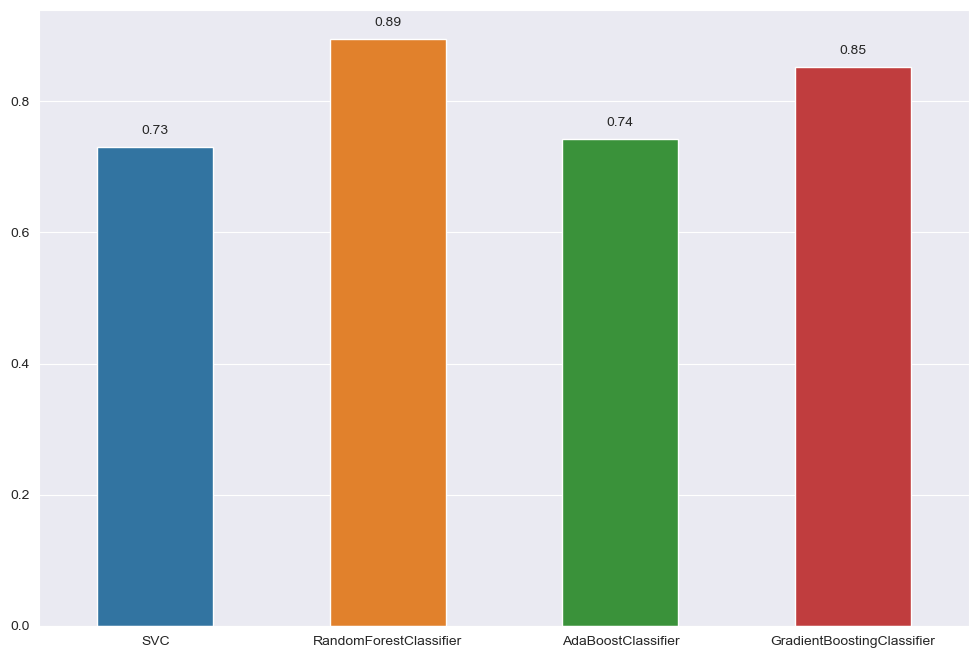

In [254]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x=result.keys(),y=result.values(),hue=result.keys(),width=.5)
for key,val in result.items():
    ax.text(key,val+.02,s=round(val,2),ha='center')